# Beautiful Data Visualization in Python
This notebook is a tutorial on creating beautiful and effective data visualizations using popular Python libraries like Matplotlib, Seaborn, and Plotly. We'll explore different types of plots, customization techniques, and how to make your visualizations both informative and aesthetically pleasing.


In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

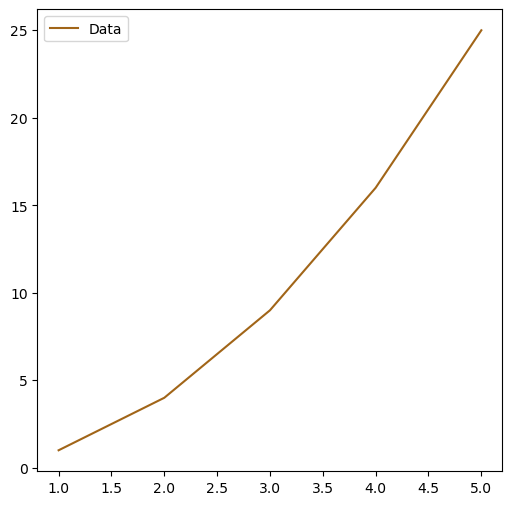

In [29]:
# Create a figure with a width of 8" and a height of 6"
fig = plt.figure(figsize=(6, 6))

# Initialize data
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Plot data
plt.plot(x, y, label='Data')

# Add legends
plt.legend()

# Display the plot
plt.show()

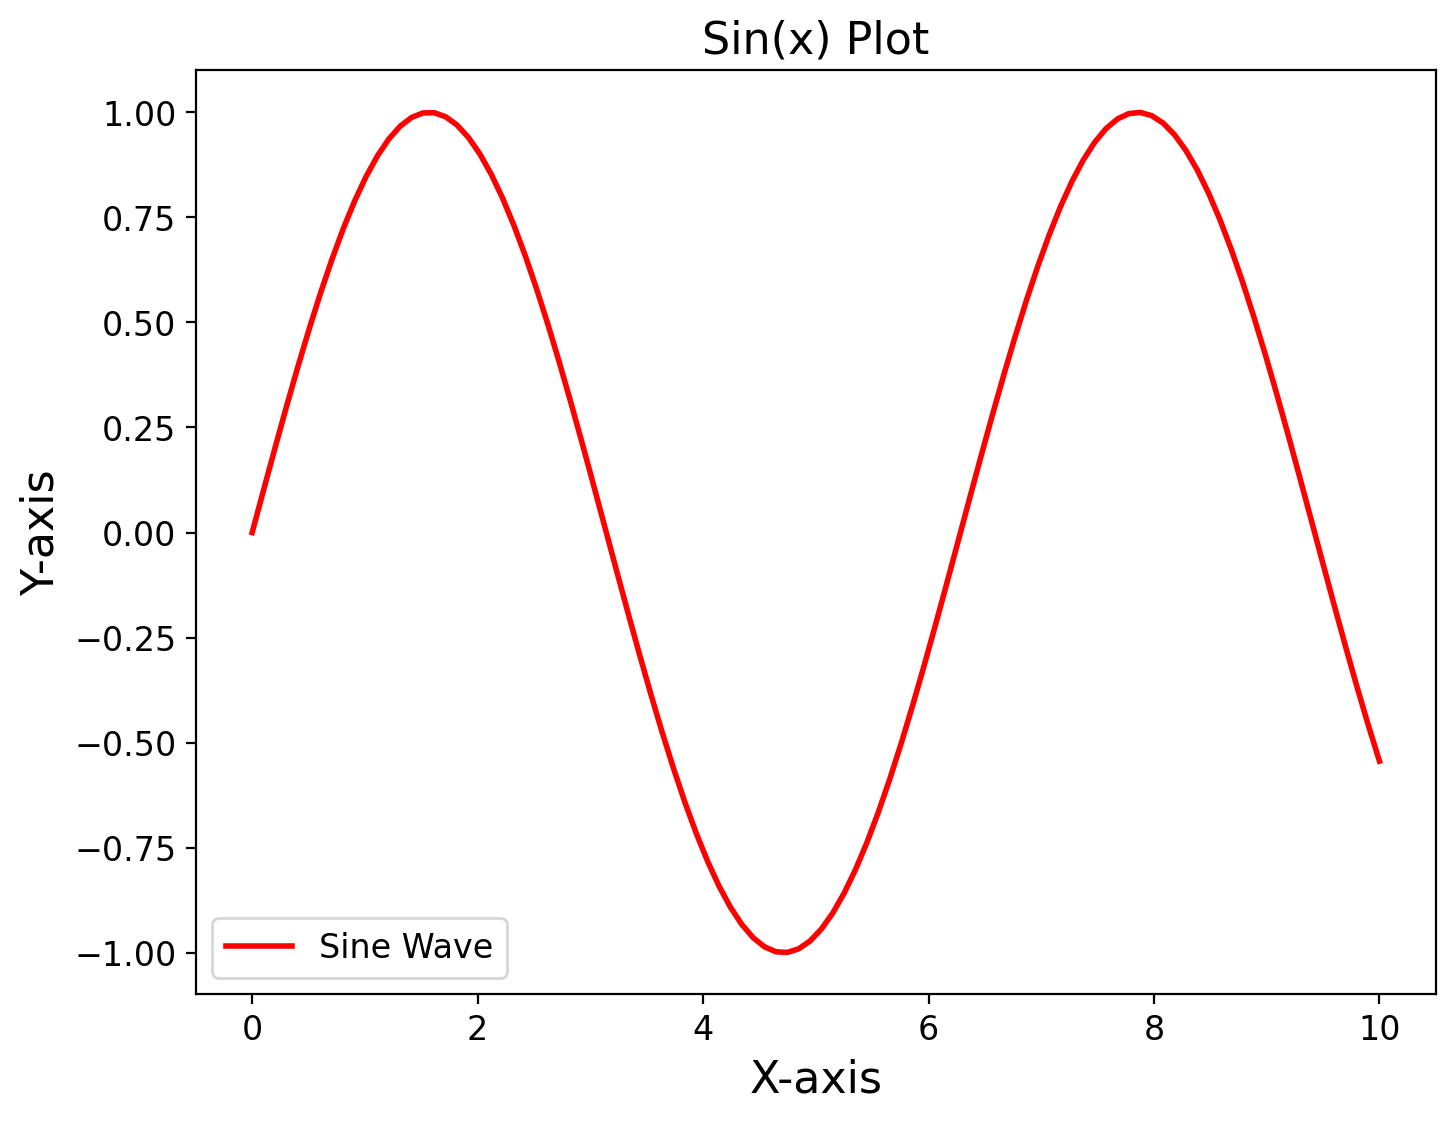

In [40]:
# Example 1: sin(x) line plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Adjust the size and resolution of the plot
plt.figure(figsize=(8, 6), dpi=200)

# Create a basic line plot, specify line color and linewidth
plt.plot(x, y, label='Sine Wave', color='red', linewidth=2)

# Add titles and labels, customize fontsize
plt.title('Sin(x) Plot', fontsize=16)
plt.xlabel('X-axis', fontsize=16)
plt.ylabel('Y-axis', fontsize=16)

# Customize fontsize for x and y ticks 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the legend, customize fontsize
plt.legend(fontsize=12)

plt.show()

**Seaborn**

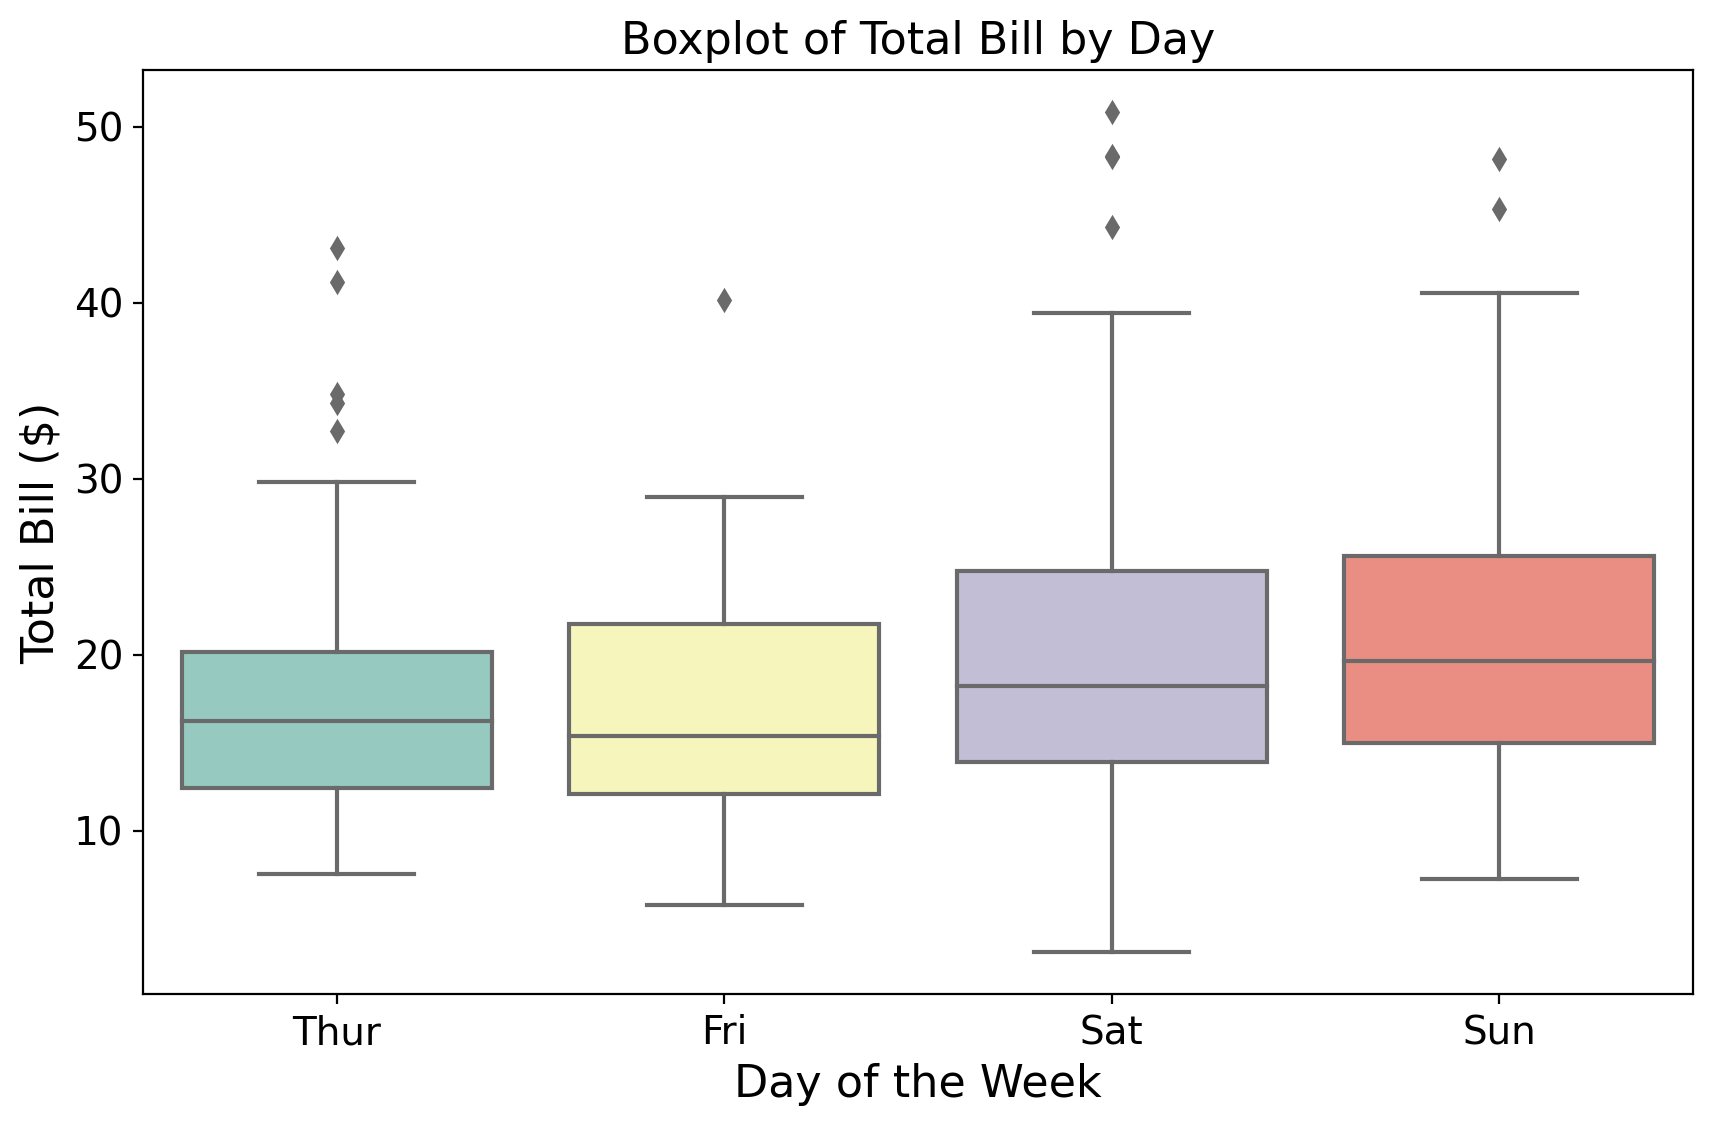

In [39]:
# Load an example dataset
df = sns.load_dataset('tips')

# Example 2: Boxplot with Seaborn
plt.figure(figsize=(10, 6), dpi=200)

# Create a boxplot, which is useful for visualizing the distribution of data
# Apply a pre-defined color palette
sns.boxplot(x='day', y='total_bill', data=df, palette='Set3')

plt.title('Boxplot of Total Bill by Day', fontsize=16)
plt.xlabel('Day of the Week', fontsize=16)
plt.ylabel('Total Bill ($)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

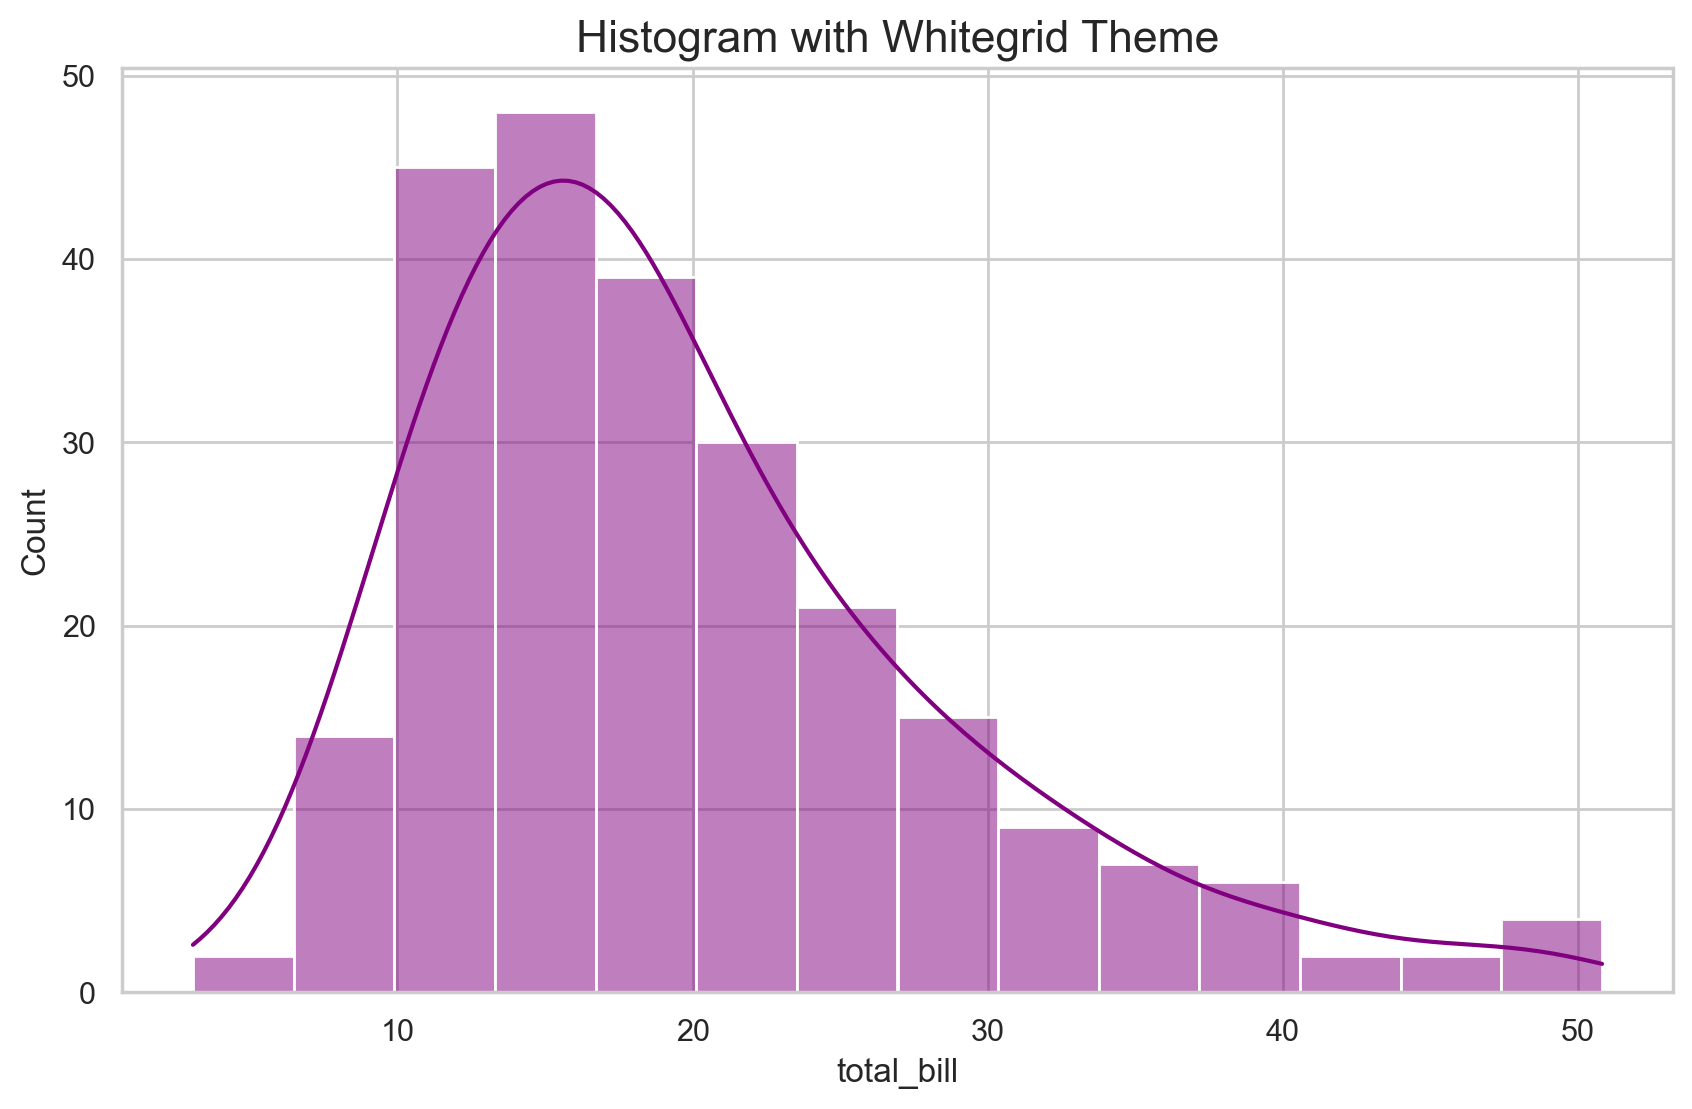

In [46]:
# Example 3: Applying Seaborn Themes

# Applies a Seaborn theme to all plots
sns.set_theme(style='whitegrid')

plt.figure(figsize=(10, 6), dpi=200)

# KDE adds a Kernel Density Estimate line to the histogram
sns.histplot(df['total_bill'], kde=True, color='purple')
plt.title('Histogram with Whitegrid Theme', fontsize=16)
plt.show()

**Interactive Visualization with Plotly**

In [42]:
import plotly.express as px

# Example 4: Interactive Scatter Plot with Plotly

# Colors points based on the day of the week
# Varies the size of points based on another variable
fig = px.scatter(df, x='total_bill', y='tip', color='day', size='size',
                 title='Interactive Scatter Plot of Tips vs. Total Bill')
fig.show()

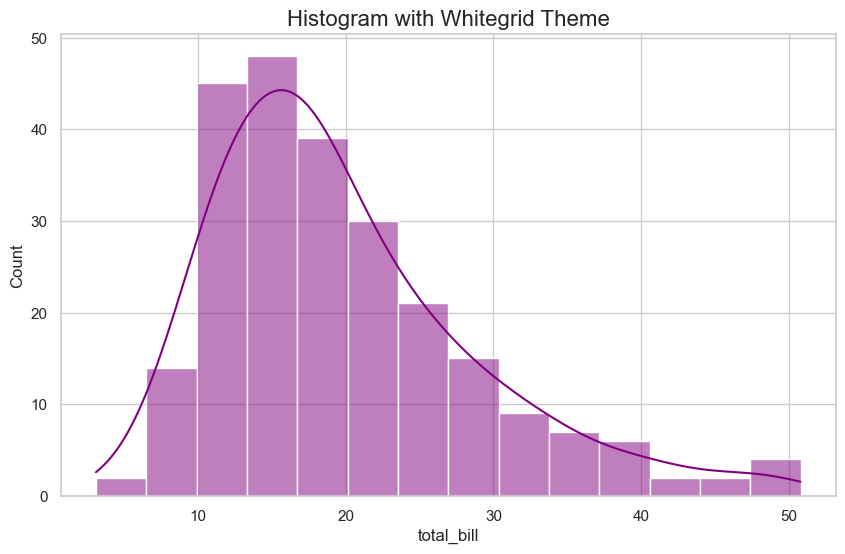

In [ ]:
# Plot some data with Seaborn
fig = plt.figure(figsize=(8, 6))
sns.lineplot(x=x, y=y, label='Data', color='red')

# Add legends
plt.legend()

plt.show

In [ ]:
# Plot some data with Seaborn
fig = plt.figure(figsize=(8, 6))
sns.lineplot(x=x, y=y, label='Data', color='red')

# Add legends
plt.legend()

plt.show